<a href="https://colab.research.google.com/github/JHWannabe/Python-AI_5/blob/main/0216%20Day2/2_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%EC%99%80_%EC%BC%80%EB%9D%BC%EC%8A%A42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist # 손글씨 숫자 이미지 데이터 셋
# x_train : 손글씨 숫자 이미지 대입
# y_train : 이미지가 의미하는 숫자 대입
# x_test : 손글씨 숫자 이미지 대입
# y_test : 이미지가 의미하는 숫자 대입
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 손글씨 숫자 이미지 데이터는 0 ~ 255 사이의 값을 가짐
# 모델 훈련에 사용하기 전에 0 ~ 1 사이의 범위를 갖도록 변경
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Model 생성, 컴파일
model = tf.keras.models.Sequential([
    # 크기 28 * 28의 배열을 입력받아 1차워너 배열로 변환
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    # 히든 레이어의 노드 갯수는 128개, 활성화 함수로 relu 사용
    tf.keras.layers.Dense(128, activation='relu'),
    # 오버피팅 방지, 이전 레이어의 출력을 20% 섞음
    tf.keras.layers.Dropout(0.2),
    # 출력레이어의 노드개수를 10개로 설정, 활성화 함수는 softmax
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'] 
)

In [5]:
# Training
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2920 - accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1411 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1049 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0855 - accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0733 - accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0642 - accuracy: 0.9799
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0581 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9836
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0476 - accuracy: 0.9840
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0713

[0.07125532627105713, 0.9807000160217285]

In [6]:
# x_train의 random한 가격 추출
import numpy as np
import matplotlib.pyplot as plt

idx = np.random.randint(len(x_train))
image = x_train[idx]

<function matplotlib.pyplot.show>

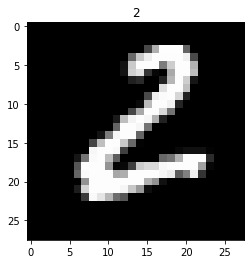

In [7]:
# image 확인
plt.imshow(image, cmap='gray')
plt.title(y_train[idx])
plt.show

In [8]:
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('업로드 파일 이름 : {name}, 용량 : {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving image.png to image (1).png
업로드 파일 이름 : image.png, 용량 : 449 bytes


/content/image.png


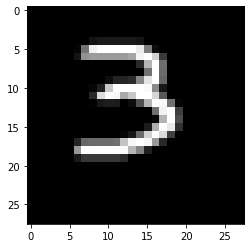

In [9]:
# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')
print(img_path)
cur_img = Image.open(img_path)

# 28 * 28 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

# color image 일 경우 RGB평균값으로 gray scale로 적용
try:
  image = np.mean(image, axis=2)
except:
  pass

# uploat한 image는 흰 배경에 검은 글씨로 되어 있으므로, MNIST data와 같이 검은 배경 흰 글씨로 변경
image = np.abs(255-image)

# MNIST와 동일하게 data preprocessing(255로 나눠줌)
image = image.astype(np.float32) /255

# 화면에 출력
plt.imshow(image, cmap='gray')
plt.show()

In [10]:
# shape를 변경하여 학습된 model에 넣고 결과를 확인
image = np.reshape(image, (1, 28, 28)) # 1장의 이미지, 픽셀 사이트
print(model.predict(image))

print('model이 예측한 값은 {} 입니다'.format(np.argmax(model.predict(image), -1)))

[[1.8351112e-03 1.9806693e-03 6.8958611e-03 1.7492574e-02 1.1934658e-01
  1.7666698e-05 1.9015103e-07 2.0140257e-01 7.2369416e-04 6.5030509e-01]]
model이 예측한 값은 [9] 입니다


In [11]:
# Dataset
# data를 처리하여 model에 공급하기 위하여 TensorFlow에 서는 tf.data.Dataset을 사용

# 트레이닝 셋 6만개, 테스트 셋 1만개, 이미지 28*28 그레이스케일, 10개의 클래스
mnist = keras.datasets.fashion_mnist
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
              
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [12]:
# train_images, train_labels의 shape 확인
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [13]:
# test_images, test_labels의 shape 확인
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [14]:
type(train_images)

numpy.ndarray

In [15]:
# training set의 각 class별 image 수 확인
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [16]:
# test set의 각 class별 image 수 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

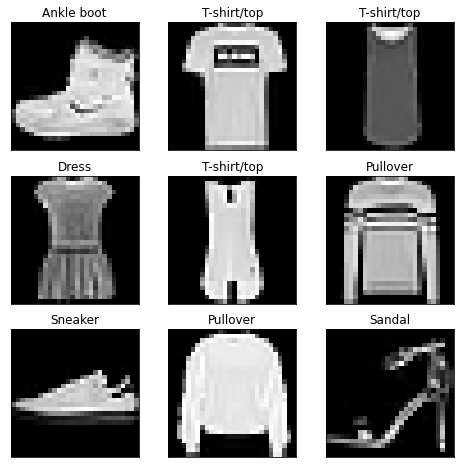

In [17]:
plt.figure(figsize=(8, 8))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(class_name[train_labels[i]])
plt.show()

In [18]:
# 데이터 전처리
# image를 0 ~ 1 사이 값으로 만들기 위해 255로 나눔
train_image = train_images.astype(np.float32) / 255.
test_image = test_images.astype(np.float32) / 255.

# one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [19]:
# dataset 만들기
# shuffle : 셔플을 하지 않으면 다음에 들어갈 데이터가 중복되어 들어갈 수 있음
# epochs 할 때 shuffle 사용
# batch : 한번에 여러개의 이미지를 넣어주는데 몇개씩 넣을 것인지 설정

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
 buffer_size = 100000).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

Feature batch shape: (64, 28, 28)
Label batch shape: (64, 10)


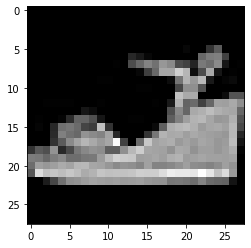

Label : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
# Dataset을 통해 반복(iterate)
imgs, lbs = next(iter(train_dataset))
print(f'Feature batch shape: {imgs.shape}')
print(f'Label batch shape: {lbs.shape}')

img = imgs[0]
lb = lbs[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label : {lb}')

In [22]:
# Custom Dataset 만들기
a = np.arange(10)
print(a)

ds_tensors = tf.data.Dataset.from_tensor_slices(a)
print(ds_tensors)

for x in ds_tensors:
  print(x)

[0 1 2 3 4 5 6 7 8 9]
<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [23]:
# shuffle(정수) : 큐 사이즈 만큼 셔플. 10개 이상이면 10개 모두 셔플, 10보다 작으면 일부만 셔플
# batch(정수) : 숫자만큼 레이어로 데이터를 보냄
ds_tensors = ds_tensors.map(tf.square).shuffle(10).batch(2)

In [24]:
for _ in range(3):
  for x in ds_tensors:
    print(x)
  print('-'*50)

tf.Tensor([ 1 81], shape=(2,), dtype=int64)
tf.Tensor([ 0 16], shape=(2,), dtype=int64)
tf.Tensor([ 4 49], shape=(2,), dtype=int64)
tf.Tensor([36  9], shape=(2,), dtype=int64)
tf.Tensor([25 64], shape=(2,), dtype=int64)
--------------------------------------------------
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor([81 25], shape=(2,), dtype=int64)
tf.Tensor([36 16], shape=(2,), dtype=int64)
tf.Tensor([ 9 49], shape=(2,), dtype=int64)
tf.Tensor([ 4 64], shape=(2,), dtype=int64)
--------------------------------------------------
tf.Tensor([36  9], shape=(2,), dtype=int64)
tf.Tensor([49  1], shape=(2,), dtype=int64)
tf.Tensor([81 25], shape=(2,), dtype=int64)
tf.Tensor([ 4 16], shape=(2,), dtype=int64)
tf.Tensor([64  0], shape=(2,), dtype=int64)
--------------------------------------------------


In [25]:
# Model
# 텐서플로우에서는 3가지 모델 작성방법을 제공함
# Keras Sequential API를 사용하는 것이 가장 간단하고 쉽게 만들 수 있는 방법

def create_seq_model():
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model